# K-Nearest Neighbors Classification

In [67]:
import numpy as np


In [68]:
a = np.random.rand(3,4)

In [69]:
a

array([[0.71980339, 0.77947027, 0.86848888, 0.83022218],
       [0.63187101, 0.03157675, 0.68844665, 0.52938887],
       [0.83999812, 0.2687063 , 0.74743432, 0.39507733]])

In [70]:
# res = 0
# for j in range(D):
#     res += (a[j] - b[j])**2
# sqrt(res)


def euclidian_distance(a, b):
    return np.sqrt(np.sum((a-b)**2, axis=1))

In [71]:
x = np.random.rand(1, 2)
y = np.random.rand(1, 2)
print(x)
print(y)
euclidian_distance(x, y)

[[0.48076812 0.76444925]]
[[0.25653926 0.90761719]]


array([0.26603691])

In [72]:
def score(X_test, y_test):
    y_pred = predict(X_test)
        
    return float(sum(y_pred == y_test))/ float(len(y_test))

In [73]:
class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors=5, weights='uniform'):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors
        self.weights = weights

        self.n_classes = 3

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

#         print(X_test, self.X_train. X_test, self.X_train)
        point_dist = []
        for x_test in X_test:
            point_dist += [ self.euclidian_distance(x_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            #print("Y_pred: ", y_pred)
            return y_pred

        if self.weights == 'distance':
            # Métrica inventada: combina potencias y logaritmos de las diferencias absolutas
            def invented_distance(x, y):
                # Ejemplo: sqrt(|x1-y1|^3 + log(1+|x2-y2|^2) + sum(|xi-yi|^1.5))
                diff = np.abs(x - y)
                # Para cada muestra, calcular la métrica inventada
                # Asume que hay al menos 2 atributos
                d1 = diff[0]**3
                d2 = np.log(1 + diff[1]**2)
                d_rest = np.sum(diff[2:]**1.5) if diff.shape[0] > 2 else 0
                return np.sqrt(d1 + d2 + d_rest)

            y_pred = []
            for x in X_test:
                # Calcular distancias de x contra todos los puntos de entrenamiento
                distances = np.array([invented_distance(x, x_train) for x_train in self.X_train])

                # Seleccionar índices de los k vecinos más cercanos
                neigh_ind = np.argsort(distances)[:self.n_neighbors]
                neigh_dist = distances[neigh_ind]

                # Evitar divisiones por cero
                epsilon = 1e-8
                weights = 1 / (neigh_dist + epsilon)

                # Acumular pesos por clase
                class_weights = np.zeros(self.n_classes)
                for idx, cls in enumerate(self.y_train[neigh_ind]):
                    class_weights[cls] += weights[idx]

                # Predecir la clase con mayor peso acumulado
                y_pred.append(np.argmax(class_weights))

            return np.array(y_pred)


    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test


# Iris dataset (Observations/Treatments)

In [74]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import time
from matplotlib import pyplot as plt
dataset = datasets.load_iris(as_frame=True)


X = dataset.data
y = dataset.target


In [75]:
X.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [76]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

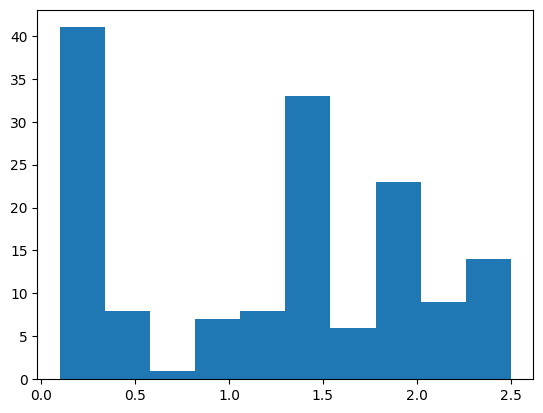

In [77]:
plt.hist(X['petal width (cm)'],10)
plt.show()

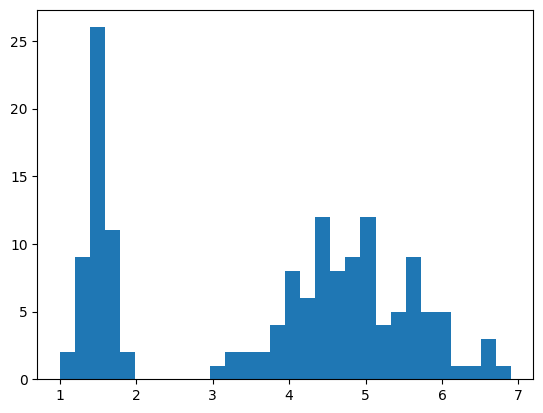

In [78]:

plt.hist(X['petal length (cm)'],30)
plt.show()

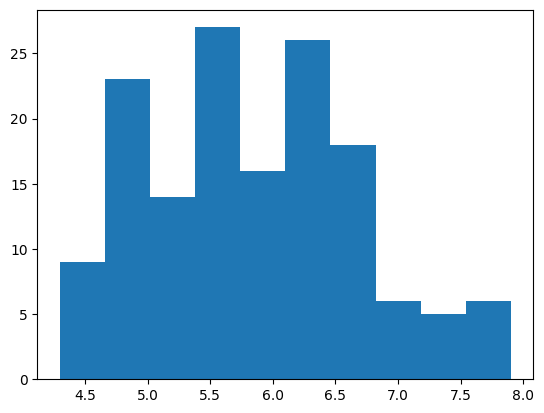

In [79]:

plt.hist(X['sepal length (cm)'],10)
plt.show()

In [80]:
mu = np.mean(X, 0)
sigma = np.std(X, 0)
X = (X - mu ) / sigma

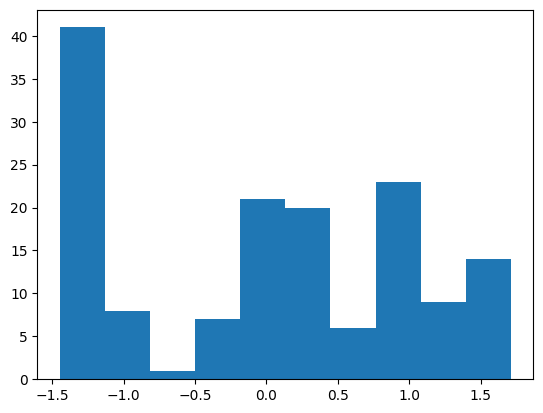

In [81]:
plt.hist(X['petal width (cm)'],10)
plt.show()

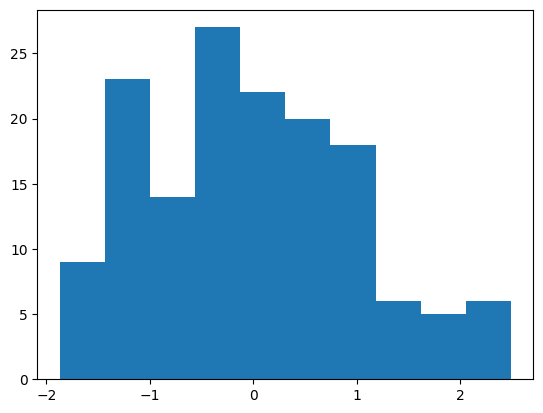

In [82]:
plt.hist(X['sepal length (cm)'],10)
plt.show()

In [83]:
dataset.target_names, dataset.feature_names


(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [84]:
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3,stratify=y, random_state=45)



our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=8)
sklearn_classifier = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)

our_accuracy, y_pred, y_test = our_classifier.score(X_test, y_test)
sklearn_accuracy = sklearn_classifier.score(X_test, y_test)

print(y_pred[:20], y_test[:20])

pd.DataFrame([[our_accuracy, sklearn_accuracy]],
             ['Accuracy'],    
             ['Our Implementation', 'Sklearn\'s Implementation'])

[1 0 2 0 0 2 0 2 1 0 1 1 1 0 1 2 1 0 1 2] [1 0 2 0 0 2 0 2 1 0 1 1 1 0 2 2 1 0 1 2]


,Our Implementation,Sklearn's Implementation
Accuracy,0.911111,0.911111


k=2 | Our accuracy: 0.9111 | Sklearn accuracy: 0.8667 | Our time: 0.0454s | Sklearn time: 0.0025s
k=3 | Our accuracy: 0.9333 | Sklearn accuracy: 0.9333 | Our time: 0.0393s | Sklearn time: 0.0063s
k=4 | Our accuracy: 0.9333 | Sklearn accuracy: 0.9333 | Our time: 0.0398s | Sklearn time: 0.0000s
k=5 | Our accuracy: 0.9333 | Sklearn accuracy: 0.9333 | Our time: 0.0450s | Sklearn time: 0.0019s
k=6 | Our accuracy: 0.9333 | Sklearn accuracy: 0.9111 | Our time: 0.0427s | Sklearn time: 0.0000s
k=7 | Our accuracy: 0.9333 | Sklearn accuracy: 0.9333 | Our time: 0.0385s | Sklearn time: 0.0102s
k=9 | Our accuracy: 0.9333 | Sklearn accuracy: 0.9333 | Our time: 0.0418s | Sklearn time: 0.0066s
k=11 | Our accuracy: 0.9333 | Sklearn accuracy: 0.9333 | Our time: 0.0439s | Sklearn time: 0.0027s


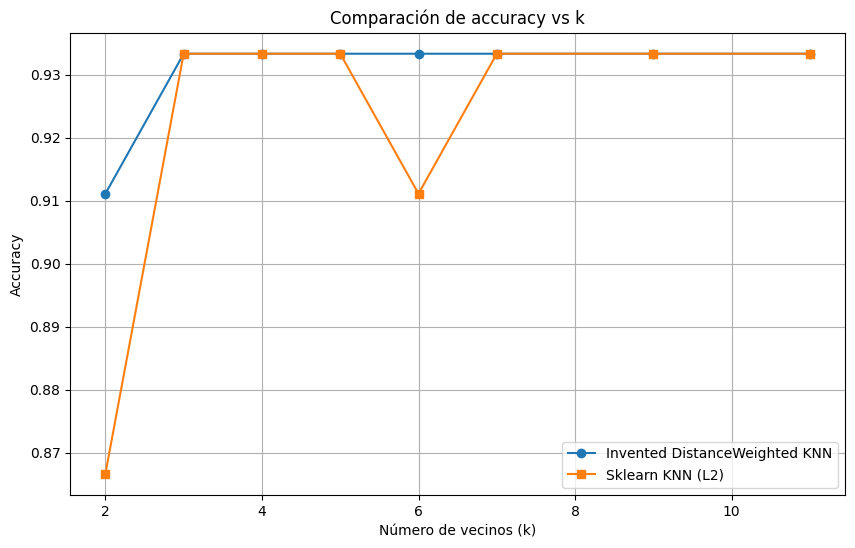

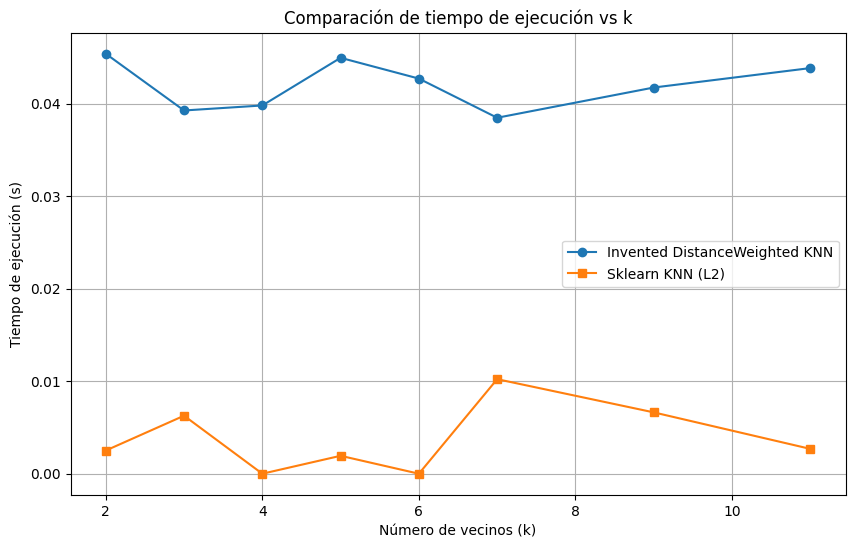

([0.9111111111111111,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333],
 [0.8666666666666667,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9111111111111111,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333])

In [85]:
def evaluate_k_range(k_values=[2, 3, 4, 5, 6, 7, 9, 11], weights="distance"):
    our_accuracies = []
    sklearn_accuracies = []
    our_times = []
    sklearn_times = []

    for k in k_values:
        # Nuestro clasificador
        model = KNearestNeighbors(X_train, y_train, n_neighbors=k, weights=weights)
        start = time.time()
        y_pred = model.predict(X_test)
        end = time.time()
        acc = accuracy_score(y_test, y_pred)
        our_accuracies.append(acc)
        our_times.append(end - start)

        # Clasificador sklearn
        sk_model = KNeighborsClassifier(n_neighbors=k)
        sk_model.fit(X_train, y_train)
        start = time.time()
        sk_pred = sk_model.predict(X_test)
        end = time.time()
        sk_acc = accuracy_score(y_test, sk_pred)
        sklearn_accuracies.append(sk_acc)
        sklearn_times.append(end - start)

        print(f"k={k} | Our accuracy: {acc:.4f} | Sklearn accuracy: {sk_acc:.4f} | Our time: {our_times[-1]:.4f}s | Sklearn time: {sklearn_times[-1]:.4f}s")

    # Graficar resultados
    plt.figure(figsize=(10,6))
    plt.plot(k_values, our_accuracies, marker='o', label='Invented DistanceWeighted KNN')
    plt.plot(k_values, sklearn_accuracies, marker='s', label='Sklearn KNN (L2)')
    plt.xlabel("Número de vecinos (k)")
    plt.ylabel("Accuracy")
    plt.title("Comparación de accuracy vs k")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(k_values, our_times, marker='o', label='Invented DistanceWeighted KNN')
    plt.plot(k_values, sklearn_times, marker='s', label='Sklearn KNN (L2)')
    plt.xlabel("Número de vecinos (k)")
    plt.ylabel("Tiempo de ejecución (s)")
    plt.title("Comparación de tiempo de ejecución vs k")
    plt.legend()
    plt.grid(True)
    plt.show()

    return our_accuracies, sklearn_accuracies
evaluate_k_range()